# Export vehicle volumne at UK-Manchester
- This script is used to export vehicle data from TfGM dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
sensor_data_path = f'{home_path}0_urban_traffic/validation/manchester/tfgm_sensor_data/s99_dale_st_road_mcc001/'
month_end_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
monthly_list = []
for month in range(1, 13):
    filename = f'{sensor_data_path}2022-{month:02d}-01_2022-{month:02d}-{month_end_list[month-1]:02d}_counts.csv'
    df_month = pd.read_csv(filename)
    df_vehicle = df_month[['UTC Datetime']].copy()
    df_vehicle['vehicle_count'] = (df_month['Car'] + df_month['Bus'] + df_month['OGV1'] + df_month['OGV2'] + df_month['LGV'])
    df_vehicle['UTC Datetime'] = pd.to_datetime(df_vehicle['UTC Datetime'])
    df_vehicle['hour'] = df_vehicle['UTC Datetime'].dt.hour
    df_vehicle['date'] = df_vehicle['UTC Datetime'].dt.date
    monthly_list.append(df_vehicle)
df_vehicle = pd.concat(monthly_list, axis=0)
df_vehicle.to_csv('UK-Manchester.csv', index=False)
df_vehicle.head()   

,UTC Datetime,vehicle_count,hour,date
0,2022-01-01 00:00:00,176.0,0,2022-01-01
1,2022-01-01 01:00:00,173.0,1,2022-01-01
2,2022-01-01 02:00:00,225.0,2,2022-01-01
3,2022-01-01 03:00:00,225.0,3,2022-01-01
4,2022-01-01 04:00:00,202.0,4,2022-01-01


In [3]:
daily_vehicle_count = df_vehicle.groupby('date')['vehicle_count'].sum()
annual_avg_daily_count = daily_vehicle_count.mean()
annual_avg_daily_count

np.float64(4696.679452054795)

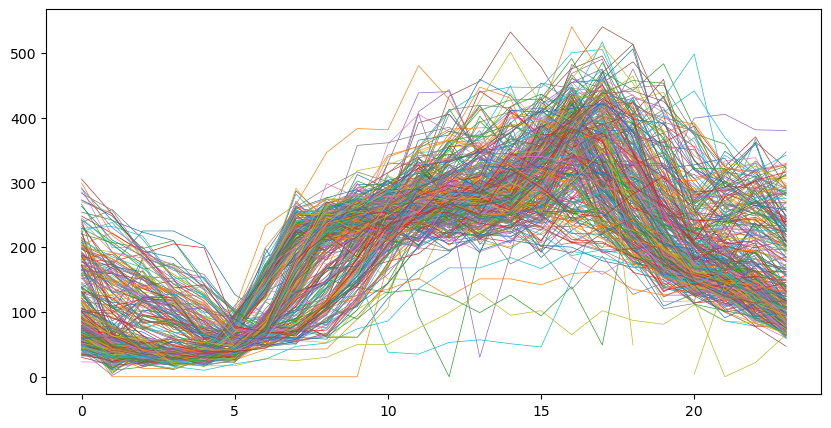

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
for date in np.unique(df_vehicle['date']):
    df_vehicle_date = df_vehicle[df_vehicle['date'] == date]
    ax.plot(df_vehicle_date['hour'], df_vehicle_date['vehicle_count'], linewidth=0.5)

hour
0     0.02
1     0.02
2     0.01
3     0.01
4     0.01
5     0.01
6     0.02
7     0.03
8     0.04
9     0.05
10    0.05
11    0.06
12    0.06
13    0.06
14    0.06
15    0.07
16    0.07
17    0.07
18    0.06
19    0.05
20    0.04
21    0.04
22    0.04
23    0.03
Name: vehicle_count, dtype: float64


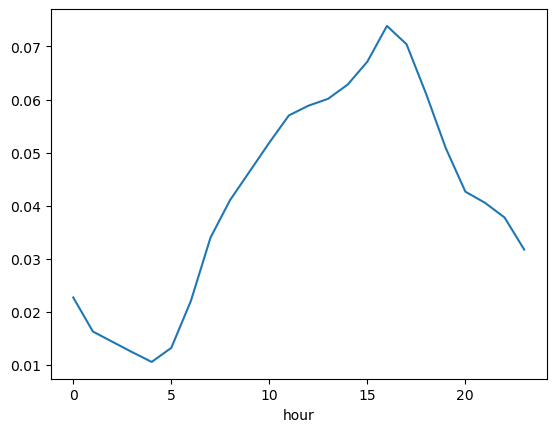

In [6]:
hourly_profile = df_vehicle.groupby('hour')['vehicle_count'].mean() / annual_avg_daily_count
hourly_profile.plot()
print(hourly_profile.round(2))